In [489]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [490]:
df = data = pd.read_csv("CleanData/2017/data.csv")
df.sample(5)

# Afficher les prédictions
count = df['Tendance'].value_counts()

print(count)

Tendance
droite    259302
gauche    216085
Name: count, dtype: int64


In [491]:

loire = df.loc[df['Code du département'] == '23']


loire.to_csv("./CleanData/loire.csv");

df = data.drop(data[data['Code du département'] == '23'].index)

display(df[df['Code du département'] == '44'])

df = df.drop([
'codgeo',
'Libellé de la commune',
'Code du département',
'Libellé du département',
'Code de la commune',
'Code Tendance',
'Parti polititque'], axis=1)


,codgeo,Nombre de résidences principales HLM,Logements secondaire,Logements principal,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Blancs,Voix,Tendance,Code Tendance,Parti polititque,Immigrés,Nombre de chômeurs de 15 à 64 ans
1683,44109,0.171031,7377.0,161555.0,44,Loire-Atlantique,109,Nantes,1942,46072,gauche,3,LREM,210.030323,0.117286
1684,44109,0.171031,7377.0,161555.0,44,Loire-Atlantique,109,Nantes,1942,46072,gauche,3,LREM,150.279750,0.117286
1685,44109,0.171031,7377.0,161555.0,44,Loire-Atlantique,109,Nantes,1942,46072,gauche,3,LREM,340.381686,0.117286
1686,44109,0.171031,7377.0,161555.0,44,Loire-Atlantique,109,Nantes,1942,46072,gauche,3,LREM,73.388582,0.117286
1687,44109,0.171031,7377.0,161555.0,44,Loire-Atlantique,109,Nantes,1942,46072,gauche,3,LREM,134.680197,0.117286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328741,44105,0.031250,17.0,153.0,44,Loire-Atlantique,105,Mouais,5,8,gauche,2,NPA,6.055857,0.106437
328742,44105,0.031250,17.0,153.0,44,Loire-Atlantique,105,Mouais,5,1,droite,4,UPR,6.055857,0.106437
328743,44105,0.031250,17.0,153.0,44,Loire-Atlantique,105,Mouais,5,0,gauche,1,LO,6.055857,0.106437
328744,44105,0.031250,17.0,153.0,44,Loire-Atlantique,105,Mouais,5,0,droite,4,SP,6.055857,0.106437


In [492]:
dummy = pd.get_dummies (df ['Tendance'])
df = pd.concat( [df, dummy ], axis = 1)
df = df.drop( ['Tendance'], axis = 1)

display(df)


,Nombre de résidences principales HLM,Logements secondaire,Logements principal,Blancs,Voix,Immigrés,Nombre de chômeurs de 15 à 64 ans,droite,gauche
0,0.113528,10607.0,257288.0,2535,56769,374.897953,0.121089,False,True
1,0.113528,10607.0,257288.0,2535,56769,374.113109,0.121089,False,True
2,0.113528,10607.0,257288.0,2535,56769,254.828472,0.121089,False,True
3,0.113528,10607.0,257288.0,2535,56769,503.887166,0.121089,False,True
4,0.113528,10607.0,257288.0,2535,56769,681.763539,0.121089,False,True
...,...,...,...,...,...,...,...,...,...
475382,0.000000,6.0,1.0,1,0,0.000000,0.000000,True,False
475383,0.000000,6.0,1.0,1,0,0.000000,0.000000,True,False
475384,0.000000,6.0,1.0,1,0,0.000000,0.000000,False,True
475385,0.000000,6.0,1.0,1,0,0.000000,0.000000,True,False


## Visualisation

<Axes: title={'center': 'Correlation matrix heatmap'}>

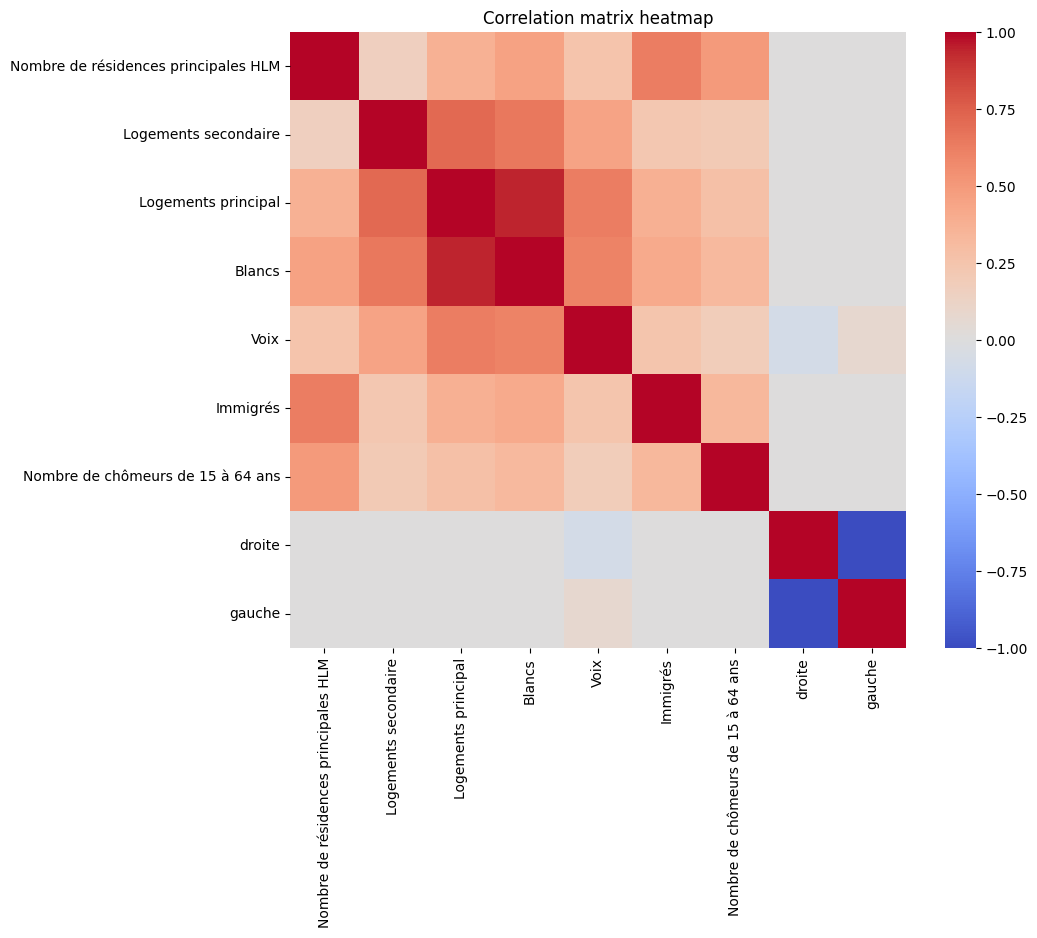

In [493]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (10, 8))
plt.title('Correlation matrix heatmap')
correlation = df.corr()
sns.heatmap(
data = correlation,
square = True,
cmap = 'coolwarm',
ax = ax
)

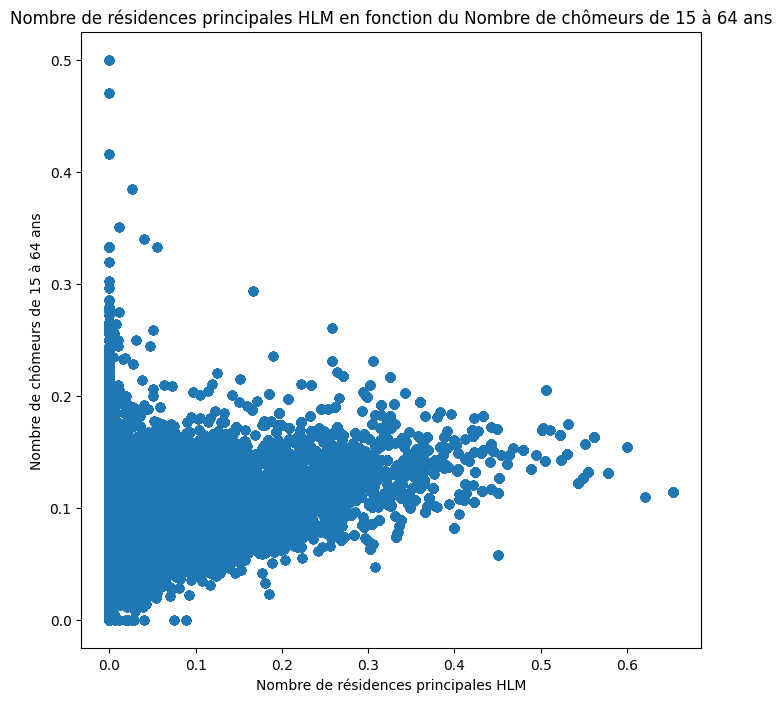

In [494]:
plt.figure(figsize = (8, 8))
plt.title("Nombre de résidences principales HLM en fonction du Nombre de chômeurs de 15 à 64 ans")
plt.xlabel('Nombre de résidences principales HLM')
plt.ylabel('Nombre de chômeurs de 15 à 64 ans')
plt.scatter(df["Nombre de résidences principales HLM"], df["Nombre de chômeurs de 15 à 64 ans"])



In [495]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

X = df.drop(["gauche", "droite"], axis=1)
Y = df[["gauche", "droite"]]


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convertir Y en un tableau 1D
y_train = y_train.idxmax(axis=1)
y_test = y_test.idxmax(axis=1)

display(x_test)
display(y_train)
display(y_test)

,Nombre de résidences principales HLM,Logements secondaire,Logements principal,Blancs,Voix,Immigrés,Nombre de chômeurs de 15 à 64 ans
415012,0.000000,49.0,66.0,4,3,4.000000,0.117647
218224,0.000000,73.0,467.0,15,28,57.168473,0.087108
104663,0.111044,56.0,6138.0,174,411,339.436660,0.092987
154402,0.063258,29.0,1733.0,53,47,68.040720,0.089481
232061,0.000000,8.0,392.0,18,32,15.094937,0.051458
...,...,...,...,...,...,...,...
39007,0.294691,834.0,28276.0,351,2252,780.718128,0.118731
267707,0.006780,8.0,268.0,5,100,48.556380,0.102616
332679,0.000000,0.0,147.0,10,5,29.000000,0.074803
117361,0.233670,105.0,4643.0,97,861,195.677602,0.094603


7455      gauche
101270    droite
389024    gauche
255546    gauche
223667    droite
           ...  
259761    gauche
367466    gauche
131987    droite
146944    gauche
122013    droite
Length: 378004, dtype: object

415012    gauche
218224    droite
104663    gauche
154402    gauche
232061    droite
           ...  
39007     droite
267707    droite
332679    droite
117361    droite
97989     gauche
Length: 94501, dtype: object

In [496]:
feature_names = df.drop(["droite", "gauche"], axis=1).columns.tolist()
feature_names

['Nombre de résidences principales HLM',
 'Logements secondaire',
 'Logements principal',
 'Blancs',
 'Voix',
 'Immigrés',
 'Nombre de chômeurs de 15 à 64 ans']

In [497]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

print(df.isna().sum())

tree_dc = DecisionTreeClassifier(max_depth=5, random_state=42);
tree_dc.fit(x_train, y_train);

y_pred = tree_dc.predict(x_test);
print(accuracy_score(y_test, y_pred))

Nombre de résidences principales HLM    0
Logements secondaire                    0
Logements principal                     0
Blancs                                  0
Voix                                    0
Immigrés                                0
Nombre de chômeurs de 15 à 64 ans       0
droite                                  0
gauche                                  0
dtype: int64
0.562703040179469


In [498]:
from sklearn.ensemble import RandomForestClassifier


rd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, max_depth=2, random_state=42)
rd_clf.fit(x_train, y_train);

KeyboardInterrupt: 

In [ ]:
print("Ordre d'importance des features")
for name, score in zip(feature_names, rd_clf.feature_importances_):
    print('%s: %i%%' %(name, int(score*100)))

In [ ]:

from sklearn.ensemble import AdaBoostClassifier


ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=200, learning_rate=0.3, random_state=42)

ada_clf.fit(x_train, y_train)

y_pred_ada = ada_clf.predict(x_test)
print('score Adaboost :' , accuracy_score(y_test, y_pred_ada))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 1, 2, 6, 8],
    'n_estimators': [50, 100, 150, 200, 500, 1000, 1500],
    'learning_rate': [0.1, 0.2, 0.4],
}
# Créer un objet GradientBoostingClassifier avec des valeurs arbitraires pour les hyperparamètres
clf = GradientBoostingClassifier(max_depth=2, n_estimators=100, learning_rate=0.1, n_iter_no_change=5, tol=0.0001)

# Effectuer une recherche de grille
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=2, error_score='raise')
grid_search.fit(x_train, y_train)

# Afficher les meilleures valeurs d'hyperparamètres
print(grid_search.best_params_)

# Entraîner un GradientBoostingClassifier avec les meilleures valeurs d'hyperparamètres
best_clf = GradientBoostingClassifier(**grid_search.best_params_)
best_clf.fit(x_train, y_train)

accuracy = best_clf.score(x_test, y_test)
print(f"Accuracy : {accuracy:.2f}")

In [ ]:

x_new = pd.read_csv("./CleanData/loire.csv")

tendances = x_new['Tendance']

x_new = x_new.drop([
'codgeo',
'Libellé de la commune',
'Code du département',
'Libellé du département',
'Code de la commune',
'Code Tendance',
'Tendance',
'Parti polititque'], axis=1)


# Effectuer des prédictions sur les nouvelles données
predictions = ada_clf.predict(x_new)

tests = pd.concat([x_new, pd.Series(predictions)], axis=1)
tests = pd.concat([tests, tendances], axis=1)

# Afficher les prédictions
unique_values, counts = np.unique(predictions, return_counts=True)

good = 0
total = 0

for i, (predicted_class, tendance) in enumerate(zip(predictions, tendances)):
    print(f"Donnée {i+1}: Tendance = {tendance}, Classe prédite = {predicted_class}")


    if predicted_class == tendance:
        good = good + 1

    total = total + 1

print("Pourcentage ", good/total)

print(unique_values)
print(counts)